## In the priject, personal food expenditure in 2019 is compared to the number of religious (Catholic) holidays in the US. Target is to see if there is a correlation between number of holidays and food expenditure in the US in 2019

## DataSets Descriptions : 
- __Personal consumption expenditure__ : U.S. Bureau of Economic Analysis, Personal consumption expenditures: https://fred.stlouisfed.org/series/DFXARC1M027SBEA

__Catholic holidays__:
- A List of Catholic Holidays in the 2019 Year:
https://www.calendar-12.com/catholic_holidays/2019

## Data preprocessing 

In [139]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests


In [140]:
#filtered edition from 2019
pce = pd.read_csv('PCE-FOOd.csv')
pce.head()

,Date,BillionsofDollars
0,2019-01-01,1018.9
1,2019-02-01,1000.3
2,2019-03-01,1015.9
3,2019-04-01,1019.7
4,2019-05-01,1022.1


In [141]:
# filterd only 2019
pce = pce[pce['Date']<= '2020']
pce.head(20)

,Date,BillionsofDollars
0,2019-01-01,1018.9
1,2019-02-01,1000.3
2,2019-03-01,1015.9
3,2019-04-01,1019.7
4,2019-05-01,1022.1
5,2019-06-01,1028.3
6,2019-07-01,1037.3
7,2019-08-01,1037.8
8,2019-09-01,1030.4
9,2019-10-01,1032.1


In [142]:
#Catholic_holiday data
import lxml.html as lh
import requests

link = "https://www.calendar-12.com/catholic_holidays/2019"
req = requests.get(link)

doc= lh.fromstring(req.text)
tab = doc.xpath('//table')[0]
rows = []
for t in tab.xpath('.//tr[@class]//td/a'):
    row = []
    row.extend(t.text.strip().replace('day,','day,xxx').split('xxx'))
    rows.extend(row)
    
for day,date in zip(rows[0::3],rows[1::3]):
    d,e = day,date
    print(d,e)
    

Tuesday,  January 1, 2019
Sunday,  January 6, 2019
Tuesday,  March 5, 2019
Wednesday,  March 6, 2019
Sunday,  April 14, 2019
Thursday,  April 18, 2019
Friday,  April 19, 2019
Sunday,  April 21, 2019
Monday,  April 22, 2019
Thursday,  May 30, 2019
Sunday,  June 9, 2019
Thursday,  June 20, 2019
Thursday,  August 15, 2019
Friday,  November 1, 2019
Monday,  December 9, 2019
Wednesday,  December 25, 2019


In [143]:
cal_19 = pd.read_csv('Calendar2019.csv')
cal_19.head(20)

,Day
0,"Tuesday, January 1, 2019"
1,"Sunday, January 6, 2019"
2,"Tuesday, March 5, 2019"
3,"Wednesday, March 6, 2019"
4,"Sunday, April 14, 2019"
5,"Thursday, April 18, 2019"
6,"Friday, April 19, 2019"
7,"Sunday, April 21, 2019"
8,"Monday, April 22, 2019"
9,"Thursday, May 30, 2019"


In [144]:
from datetime import datetime

# Strip out weekday name
cal_19["Date"] =  cal_19.apply(lambda row:row["Day"][row["Day"].find(",")+1:], axis=1)
# Convert to date
cal_19["Date"] =  cal_19.apply(lambda row: datetime.strptime(row["Date"], " %B %d, %Y"), axis=1)
cal_19["Holiday"] = 1
cal_19.head()

,Day,Date,Holiday
0,"Tuesday, January 1, 2019",2019-01-01,1
1,"Sunday, January 6, 2019",2019-01-06,1
2,"Tuesday, March 5, 2019",2019-03-05,1
3,"Wednesday, March 6, 2019",2019-03-06,1
4,"Sunday, April 14, 2019",2019-04-14,1


In [145]:
# Convert to expenditure also to date
pce["DATE"] = pce.apply(lambda row: datetime.strptime(row["Date"], "%Y-%m-%d"), axis=1)
pce.head()

,Date,BillionsofDollars,DATE
0,2019-01-01,1018.9,2019-01-01
1,2019-02-01,1000.3,2019-02-01
2,2019-03-01,1015.9,2019-03-01
3,2019-04-01,1019.7,2019-04-01
4,2019-05-01,1022.1,2019-05-01


In [146]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib notebook


<IPython.core.display.Javascript object>


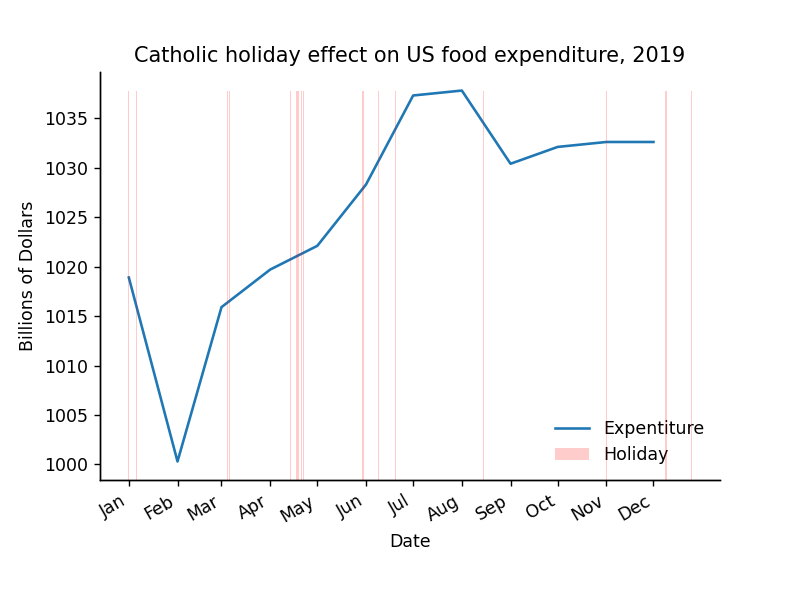

In [152]:
fig, ax = plt.subplots()
a = ax.plot(list(pce["DATE"]), pce["BillionsofDollars"], label="Expentiture", zorder=10)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.xlabel("Date")
plt.ylabel("Billions of Dollars")
plt.title("Catholic holiday effect on US food expenditure, 2019")

ax2 = ax.twinx()
#b = ax2.scatter(list(df_catholic["Date"]),df_catholic["Holiday"], s=60, c="red", alpha=0.7, label="Holiday")

b = ax2.bar(list(cal_19["Date"]),cal_19["Holiday"], alpha=0.2, label="Holiday", color="Red")

ax2 = plt.gca()
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

#my_xticks = ['','','Holiday','', '']
#plt.yticks(list(df_catholic["Holiday"]), my_xticks)

ax2 = plt.gca()
ax2.yaxis.set_visible(False)

# Combine legend
h1, l1 = ax.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax.legend(h1+h2, l1+l2, loc=4, frameon = False)

months = ['Jan','Feb','Mar','Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct' ,'Nov', 'Dec', 'Jan']
plt.xticks(list(pce["DATE"]), months, rotation='vertical')
fig.autofmt_xdate()

plt.show()

# Conclusion

This visualisation aims to find an answer to a question about correlation between food expenditure in 2019 and Catholic holidays in the US in 2019. Two different web sites were scraped for informatio. For Catholic holidays Calendar-12.com and for food expenditure in the US FRED Economic Data was utilized. Calendar-12.com provided holiday information was scraped from a static html page and FRED information was downloaded in the form of filtered csv file. Food expenditure and holidays were plotted in a single graph where expenditure is shown as a line graph and holidays are projected on to this graph with thin bar charts.

Plot shows food expenditure change and holidays in a given month. From the graph it is clear to see that there is no correlation between amount of holidays and food expenditure change. However we can see that some months, May and March, seem to have sharp rise in food expenditure. But just based on data used in this paper we can't draw conclusions between food expenditure and Catholic holidays.